In [470]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import (RandomOverSampler)

In [471]:
os.getcwd()

'/Users/arvindpawar/Desktop/XN Updated'

In [472]:
os.chdir(r'/Users/arvindpawar/Desktop/XN Updated')

In [473]:
indicatorData=pd.read_csv('indicator_pairs_data updated.csv')

In [474]:
indicatorData['alert_type'].value_counts()

Atomic          92589
Daily_Heat      16379
Weekly_Heat     11681
Monthly_Heat    11428
Name: alert_type, dtype: int64

In [475]:
indicatorData.loc[indicatorData['alert_type'] == 'Weekly_Heat'].reset_index()

,index,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,alert_category,alert_type,indicator_pairs
0,11005,2/9/2018,1355807855,2/8/2018,1344,Senior_Analyst_1,19616361638,5.868996,229,TP/DE,None,Heat,Weekly_Heat,App_1_Heat_Box_PRE_2016_Q3
1,11014,2/9/2018,1820665313,2/8/2018,1392,Senior_Analyst_1,19616361638,6.078603,229,TP/DE,None,Heat,Weekly_Heat,App_1_Heat_Box_PRE_2016_Q3
2,11072,2/9/2018,1443239342,2/9/2018,1377,Senior_Analyst_1,19616361638,5.884615,234,TP/DE,None,Heat,Weekly_Heat,App_1_Heat_Box_PRE_2016_Q3
3,11188,2/9/2018,925641347,2/9/2018,1383,Senior_Analyst_1,19616361638,5.668033,244,TP/DE,None,Heat,Weekly_Heat,App_1_Heat_Box_PRE_2016_Q3
4,11236,2/9/2018,942732622,2/9/2018,1380,Senior_Analyst_1,19616361638,5.587045,247,TP/DE,None,Heat,Weekly_Heat,App_1_Heat_Box_PRE_2016_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,132067,9/24/2019,1118112272,9/24/2019,617,Analyst_7,3388632044,5.609091,110,TP/DE,None,Heat,Weekly_Heat,App_13_Heat_Print_IND/App_6_Heat_Print_NON_MIL...
11677,132070,9/24/2019,1200315855,9/24/2019,460,Analyst_7,20933453827,5.111111,90,TP/DE,HRU11,Heat,Weekly_Heat,App_10_Threshold_Access_30_Day/App_10_Threshol...
11678,132072,9/24/2019,1942510248,9/24/2019,609,Analyst_7,665484379,5.437500,112,TP/DE,None,Heat,Weekly_Heat,App_15_Heat_Badge_MS/App_3_Heat_Email_CD/App_9...
11679,132074,9/24/2019,1118117103,9/24/2019,980,Analyst_7,2841423367,8.376068,117,TP/DE,None,Heat,Weekly_Heat,App_3_Heat_Email_CD/Threshold_Heat_BA_IND/Thre...


In [476]:
indicatorData=indicatorData.loc[indicatorData['alert_type'] == 'Weekly_Heat'].reset_index()

In [477]:
indicatorData.shape

(11681, 14)

In [478]:
indicatorData['classification'].value_counts()

TP/DE      8561
FP         1452
TP/LOW     1129
TP/HIGH     539
Name: classification, dtype: int64

In [479]:
employeeData=pd.read_csv('obfuscated_demo_data2.csv')

In [480]:
employeeData.head()

,employee_id,person_type,person_status,ge_hire_date,city,state_name,country_name,function_group,job_function,career_band,industry_focus_name
0,2163707601,EMPLOYEE,A,9/1/1997 0:00,Reau,No_Data,France,Production,JOB_FUNCTION_7,CAREER_BAND_10,BUSINESS_SEGMENT_4
1,9225331209,EMPLOYEE,A,8/22/2006 0:00,Dubai,Dubai,United Arab Emirates,Commercial,JOB_FUNCTION_22,CAREER_BAND_9,BUSINESS_SEGMENT_4
2,9777696464,EMPLOYEE,I,3/1/2007 0:00,Dubai,Dubai,United Arab Emirates,Production,JOB_FUNCTION_24,CAREER_BAND_4,BUSINESS_SEGMENT_4
3,8893235549,EMPLOYEE,A,9/1/2003 0:00,Dzierzoniow,Lower Silesian,Poland,Enabling,JOB_FUNCTION_10,CAREER_BAND_4,BUSINESS_SEGMENT_4
4,1310142434,EMPLOYEE,I,9/4/2000 0:00,Veresegyhaz,Pest,Hungary,Production,JOB_FUNCTION_7,CAREER_BAND_10,BUSINESS_SEGMENT_4


In [481]:
employeeData['person_status'].unique()

array(['A', 'I'], dtype=object)

In [482]:
employeeData=employeeData.drop_duplicates(subset ="employee_id")

In [483]:
employeeData.shape

(3157, 11)

In [484]:
employeeData['Year']=pd.DatetimeIndex(employeeData['ge_hire_date']).year

In [485]:
employeeData.isnull().sum()

employee_id              0
person_type              0
person_status            0
ge_hire_date           478
city                   142
state_name             174
country_name           174
function_group         174
job_function             0
career_band              0
industry_focus_name      0
Year                   478
dtype: int64

In [486]:
employeeData['tenure']=(2020-employeeData['Year'])

In [487]:
empdummydata=pd.get_dummies(employeeData, columns=['career_band', 'job_function'])

In [488]:
empdummydata=empdummydata.iloc[:, np.r_[0,10:47]]

In [489]:
empdummydata.head()

,employee_id,tenure,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,...,job_function_JOB_FUNCTION_24,job_function_JOB_FUNCTION_25,job_function_JOB_FUNCTION_26,job_function_JOB_FUNCTION_3,job_function_JOB_FUNCTION_4,job_function_JOB_FUNCTION_5,job_function_JOB_FUNCTION_6,job_function_JOB_FUNCTION_7,job_function_JOB_FUNCTION_8,job_function_JOB_FUNCTION_9
0,2163707601,23.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9225331209,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9777696464,13.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8893235549,17.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1310142434,20.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [490]:
testset=empdummydata[empdummydata['tenure'].isnull()]

In [491]:
trainset=empdummydata[~empdummydata['tenure'].isnull()]

In [492]:
trainset.head()

,employee_id,tenure,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,...,job_function_JOB_FUNCTION_24,job_function_JOB_FUNCTION_25,job_function_JOB_FUNCTION_26,job_function_JOB_FUNCTION_3,job_function_JOB_FUNCTION_4,job_function_JOB_FUNCTION_5,job_function_JOB_FUNCTION_6,job_function_JOB_FUNCTION_7,job_function_JOB_FUNCTION_8,job_function_JOB_FUNCTION_9
0,2163707601,23.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9225331209,14.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9777696464,13.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8893235549,17.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1310142434,20.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [493]:
testset.head()

,employee_id,tenure,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,...,job_function_JOB_FUNCTION_24,job_function_JOB_FUNCTION_25,job_function_JOB_FUNCTION_26,job_function_JOB_FUNCTION_3,job_function_JOB_FUNCTION_4,job_function_JOB_FUNCTION_5,job_function_JOB_FUNCTION_6,job_function_JOB_FUNCTION_7,job_function_JOB_FUNCTION_8,job_function_JOB_FUNCTION_9
5,8714002494,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,187153423,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,4680091097,NaN,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14,9678700500,NaN,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
91,19639355437,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [494]:
X=trainset.iloc[:, 2:]

In [495]:
# X=trainset.iloc[:, 2:]
Y=trainset.iloc[:, 1]
# regressor=DecisionTreeRegressor(random_state=0)
# regressor.fit(X,Y)
# testset_pred=testset.iloc[:,2:]
# tenure_predict=regressor.predict(testset_pred)
# testset=testset.reset_index()
# testset=testset.drop(['index'], axis=1)
# testset['tenure_pred']=pd.DataFrame({"tenure_pred":tenure_predict})
# testset=testset.drop(['tenure'], axis=1)
# employeeData.loc[employeeData.employee_id.isin(testset.employee_id),'tenure'] = employeeData.employee_id.map(testset.set_index('employee_id').tenure_pred)

In [496]:
regressor=DecisionTreeRegressor(random_state=0)

In [497]:
regressor.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [498]:
testset_pred=testset.iloc[:,2:]

In [499]:
tenure_predict=regressor.predict(testset_pred)

In [500]:
testset=testset.reset_index()

In [501]:
testset=testset.drop(['index'], axis=1)

In [502]:
testset['tenure_pred']=pd.DataFrame({"tenure_pred":tenure_predict})

In [503]:
testset=testset.drop(['tenure'], axis=1)

In [504]:
employeeData.loc[employeeData.employee_id.isin(testset.employee_id),'tenure'] = employeeData.employee_id.map(testset.set_index('employee_id').tenure_pred)

In [505]:
employeeData.isnull().sum()

employee_id              0
person_type              0
person_status            0
ge_hire_date           478
city                   142
state_name             174
country_name           174
function_group         174
job_function             0
career_band              0
industry_focus_name      0
Year                   478
tenure                   0
dtype: int64

In [506]:
newdata = indicatorData.merge(employeeData,
                             left_on = 'employee_id',
                             right_on = 'employee_id',
                             how = 'left')

In [507]:
newdata.isnull().sum()

index                       0
alert_escalation_date       0
alert_id_fk                 0
insert_date                 0
score                       0
owner_name                 63
employee_id                 0
risk_factor                 0
avg_score                   0
classification              0
hru                         0
alert_category              0
alert_type                  0
indicator_pairs             0
person_type                 0
person_status               0
ge_hire_date             2801
city                      652
state_name               1027
country_name             1027
function_group           1027
job_function                0
career_band                 0
industry_focus_name         0
Year                     2801
tenure                      0
dtype: int64

In [508]:
newdata['classification'].value_counts()

TP/DE      8561
FP         1452
TP/LOW     1129
TP/HIGH     539
Name: classification, dtype: int64

In [509]:
newdata["owner_name"].fillna("None", inplace = True) 

In [510]:
newdata["country_name"].fillna("None", inplace = True) 

In [511]:
newdata.isnull().sum()

index                       0
alert_escalation_date       0
alert_id_fk                 0
insert_date                 0
score                       0
owner_name                  0
employee_id                 0
risk_factor                 0
avg_score                   0
classification              0
hru                         0
alert_category              0
alert_type                  0
indicator_pairs             0
person_type                 0
person_status               0
ge_hire_date             2801
city                      652
state_name               1027
country_name                0
function_group           1027
job_function                0
career_band                 0
industry_focus_name         0
Year                     2801
tenure                      0
dtype: int64

In [512]:
newdata.shape

(11681, 26)

In [513]:
newdata['classification'].value_counts()

TP/DE      8561
FP         1452
TP/LOW     1129
TP/HIGH     539
Name: classification, dtype: int64

In [514]:
from pandas import Series

In [515]:
s=newdata['indicator_pairs'].str.split('/').apply(Series, 1).stack()

In [516]:
s.index=s.index.droplevel(-1)

In [517]:
s.name='indicators'

In [518]:
newdata_fin_s=newdata.join(s)

In [519]:
newdata_fin_s.shape

(37770, 27)

In [520]:
d=newdata_fin_s.duplicated(subset=None, keep='last')

In [521]:
d.value_counts()

False    34223
True      3547
dtype: int64

In [522]:
newdata_fin_s.drop_duplicates(keep='last', inplace=True)

In [523]:
newdata_fin_s.to_csv(r'/Users/arvindpawar/Desktop/XN Updated/new_fin_s_nipa_updated.csv')

In [524]:
newdata_fin_s.shape

(34223, 27)

In [525]:
newdata_fin_s['classification'].value_counts()

TP/DE      25556
TP/LOW      3603
FP          3117
TP/HIGH     1947
Name: classification, dtype: int64

In [526]:
newdata1 = newdata_fin_s.drop(['alert_escalation_date','insert_date','alert_category','alert_type'
                               ,'person_status','ge_hire_date','city','state_name',
                         'function_group', 'alert_id_fk', 'avg_score', 'Year', 
                               'person_type', 'country_name', 'industry_focus_name'
                               ], axis=1)

In [527]:
newdata_fin_dummy=pd.get_dummies(newdata1, columns=['owner_name','classification','hru','job_function','indicators',
                                                       'career_band'
                                                    ])

In [528]:
newdata_fin_dummy_backup=newdata_fin_dummy.copy()

In [529]:
newdata_final_avi = newdata_fin_dummy.drop(['employee_id', 'indicator_pairs'], axis=1)

In [530]:
newdata_final_avi=newdata_final_avi.drop(['index'], axis=1)

In [531]:
newdata_final_avi.head()

,score,risk_factor,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_None,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,1344,5.868996,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1392,6.078603,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1377,5.884615,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1383,5.668033,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1380,5.587045,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [532]:
from sklearn.cluster import KMeans

In [533]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(newdata_final_avi)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

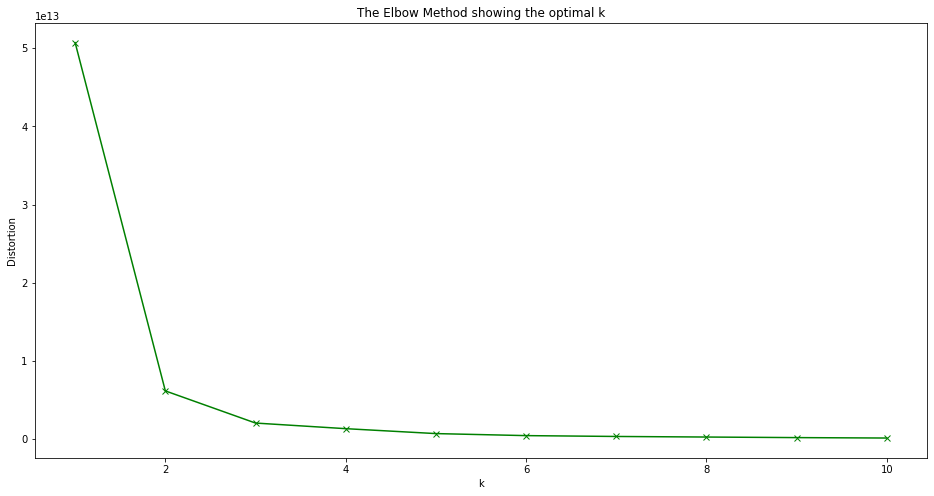

In [534]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', color='green')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [535]:
# from sklearn.metrics import silhouette_score
# range_n_clusters = list (range(3,10))
# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters)
#     preds = clusterer.fit_predict(newdata_final_avi)
#     centers = clusterer.cluster_centers_

#     score = silhouette_score(newdata_final_avi, preds)
#     print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

In [536]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [537]:
clusters = kmeans.fit_predict(newdata_final_avi)

In [538]:
print(clusters)

[0 0 0 ... 0 0 0]


In [539]:
newdata_fin_dummy=newdata_fin_dummy.drop(['index', 'employee_id'], axis=1)

In [540]:
newdata_fin_dummy

,score,risk_factor,indicator_pairs,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,1344,5.868996,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1392,6.078603,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1377,5.884615,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1383,5.668033,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1380,5.587045,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11679,980,8.376068,App_3_Heat_Email_CD/Threshold_Heat_BA_IND/Thre...,12.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
11679,980,8.376068,App_3_Heat_Email_CD/Threshold_Heat_BA_IND/Thre...,12.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
11679,980,8.376068,App_3_Heat_Email_CD/Threshold_Heat_BA_IND/Thre...,12.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
11680,1152,5.097345,App_3_Heat_Email_CD/Threshold_Heat_Email_IND,9.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [541]:
newdata_fin_dummy= newdata_fin_dummy.reset_index()
df= pd.DataFrame(clusters)
df.columns = ['cluster_pred']
df1_avi= pd.concat([newdata_fin_dummy, df], axis = 1).reset_index()

In [542]:
# df1_avi.head()

In [543]:
# df1_avi.iloc[:, 7:]

In [544]:
gb = df1_avi.groupby(['cluster_pred']).sum()

In [545]:
gb[['classification_TP/HIGH', 'classification_TP/LOW']]

,classification_TP/HIGH,classification_TP/LOW
cluster_pred,,
0,1813.0,3325.0
1,18.0,27.0
2,116.0,226.0
3,0.0,25.0


In [546]:
gb.to_csv(r'/Users/arvindpawar/Desktop/Automic ss/updated_weekly_avi_4.csv')

In [357]:
##TP/HIGH is 1 and rest are 0 - predictive analytics

In [358]:
#random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')
newdata_rf_dummy=pd.get_dummies(newdata1, columns=['owner_name','hru','indicators',
                                                    'job_function','career_band'
                                                       ])

newdata_rf_dummy=newdata_rf_dummy.drop(['indicator_pairs'], axis=1)
newdata_rf_dummy['classification'].replace({"FP":"0", "TP/DE":"1", "TP/LOW":"2", "TP/HIGH":"3"}, inplace=True)
newdata_rf_dummy=newdata_rf_dummy.drop(['index'], axis=1)

#Creating the dependent variable class
factor = pd.factorize(newdata_rf_dummy['classification'])
newdata_rf_dummy.classification = factor[0]
definitions = factor[1]
print(newdata_rf_dummy.classification.head())
print(definitions)

Libraries Imported
0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Index(['1', '3', '0', '2'], dtype='object')


In [359]:
#newdata_rf_dummy=newdata_rf_dummy.drop(['index'], axis=1)

In [360]:
tpHighDf=newdata_rf_dummy.copy()

In [361]:
tpHighDf['classification'].unique()

array([0, 1, 2, 3])

In [362]:
tpHighDf['classification'] = (tpHighDf['classification'] == 3).astype(int)

In [363]:
tpHighDf['classification'].value_counts()

0    30620
1     3603
Name: classification, dtype: int64

In [364]:
tpHighDf.shape

(34223, 147)

In [365]:
#Decision Tree TP/HIGH = 1 and rest are 0

In [366]:
from sklearn.tree import DecisionTreeClassifier

In [367]:
from sklearn.model_selection import train_test_split

In [368]:
from sklearn import metrics

In [369]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,1344,19616361638,5.868996,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1392,19616361638,6.078603,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1377,19616361638,5.884615,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1383,19616361638,5.668033,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1380,19616361638,5.587045,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [370]:
tpHighDf.iloc[:, np.r_[0, 2, 4:147]]

,score,risk_factor,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_None,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,1344,5.868996,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1392,6.078603,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1377,5.884615,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1383,5.668033,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1380,5.587045,22.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11679,980,8.376068,12.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
11679,980,8.376068,12.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
11679,980,8.376068,12.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
11680,1152,5.097345,9.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [371]:
X=tpHighDf.iloc[:, np.r_[0, 2, 4:147]]
Y=tpHighDf.iloc[:, 3]

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [373]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [374]:
clf=DecisionTreeClassifier()

In [375]:
clf=clf.fit(X_rs, y_rs)

In [376]:
y_pred=clf.predict(X_test)

In [377]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9177948767897146


In [378]:
print("Decision Tree for High Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree for High Risk
Predicted Observation     0    1
Actual Observation              
0                      8711  494
1                       350  712
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9205
           1       0.59      0.67      0.63      1062

    accuracy                           0.92     10267
   macro avg       0.78      0.81      0.79     10267
weighted avg       0.92      0.92      0.92     10267


Accuracy: 0.9177948767897146


In [379]:
confusion_matrix(y_test, y_pred)

array([[8711,  494],
       [ 350,  712]])

In [380]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9205
           1       0.59      0.67      0.63      1062

    accuracy                           0.92     10267
   macro avg       0.78      0.81      0.79     10267
weighted avg       0.92      0.92      0.92     10267



In [381]:
#random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


In [382]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,1344,19616361638,5.868996,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1392,19616361638,6.078603,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1377,19616361638,5.884615,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1383,19616361638,5.668033,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1380,19616361638,5.587045,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [383]:
#Creating the dependent variable class (factorization)
factor = pd.factorize(tpHighDf['classification'])
tpHighDf.classification = factor[0]
definitions = factor[1]
print(tpHighDf.classification.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [384]:
X=tpHighDf.iloc[:, np.r_[0, 2, 4:147]]
Y=tpHighDf.iloc[:, 3]

In [385]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 21)

In [386]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [387]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [388]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_rs, y_rs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [389]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [390]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [391]:
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(4),definitions))


In [392]:
y_test = np.vectorize(reversefactor.get)(y_test)


In [393]:
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print("Random Forest for High Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest for High Risk
Predicted Observation     0    1
Actual Observation              
0                      8689  466
1                       382  730
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9155
           1       0.61      0.66      0.63      1112

    accuracy                           0.92     10267
   macro avg       0.78      0.80      0.79     10267
weighted avg       0.92      0.92      0.92     10267


Accuracy: 0.9174052790493815


In [394]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9174052790493815


In [395]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9155
           1       0.61      0.66      0.63      1112

    accuracy                           0.92     10267
   macro avg       0.78      0.80      0.79     10267
weighted avg       0.92      0.92      0.92     10267



In [396]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

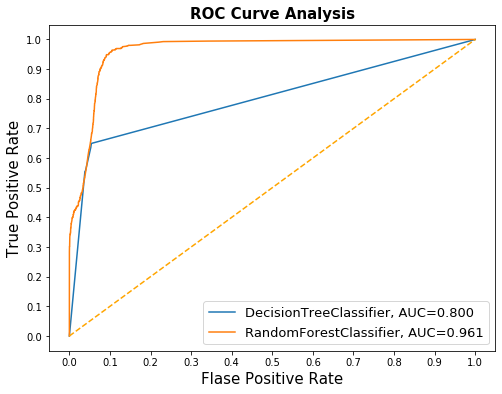

In [397]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [398]:
#TP/HIGH and TP/LOW 1 and rest 0 #DT

In [399]:
tpHighNewDf=newdata_rf_dummy.copy()

In [400]:
tpHighNewDf['classification'].unique()

array([0, 1, 2, 3])

In [401]:
tpHighNewDf['classification'].replace({0:0, 1:0, 2:1, 3:1}, inplace=True)

In [402]:
tpHighNewDf['classification'].value_counts()

0    27503
1     6720
Name: classification, dtype: int64

In [403]:
X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:147]]
Y=tpHighNewDf.iloc[:, 3]

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [405]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [406]:
clf=DecisionTreeClassifier()

In [407]:
clf=clf.fit(X_rs, y_rs)

In [408]:
y_pred=clf.predict(X_test)

In [409]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9086393298918867


In [410]:
print("Decision Tree for Notable Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree for Notable Risk
Predicted Observation     0     1
Actual Observation               
0                      7717   538
1                       400  1612
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8255
           1       0.75      0.80      0.77      2012

    accuracy                           0.91     10267
   macro avg       0.85      0.87      0.86     10267
weighted avg       0.91      0.91      0.91     10267


Accuracy: 0.9086393298918867


In [411]:
#RB 
#Creating the dependent variable class
factor = pd.factorize(tpHighNewDf['classification'])
tpHighNewDf.classification = factor[0]
definitions = factor[1]
print(tpHighNewDf.classification.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [412]:
X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:147]]
Y=tpHighNewDf.iloc[:, 3]

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=21)

In [414]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [415]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [416]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_rs, y_rs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [417]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [418]:
print("Random Forest for Notable Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest for Notable Risk
Predicted Observation     0     1
Actual Observation               
0                      7685   512
1                       431  1639
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8197
           1       0.76      0.79      0.78      2070

    accuracy                           0.91     10267
   macro avg       0.85      0.86      0.86     10267
weighted avg       0.91      0.91      0.91     10267


Accuracy: 0.9081523327164702


In [419]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9081523327164702


In [420]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8197
           1       0.76      0.79      0.78      2070

    accuracy                           0.91     10267
   macro avg       0.85      0.86      0.86     10267
weighted avg       0.91      0.91      0.91     10267



In [421]:
y_test.shape

(10267,)

In [422]:
y_pred.shape

(10267,)

In [423]:
#TP/HIGH and TP/LOW are 0 and rest are set to 1

In [424]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

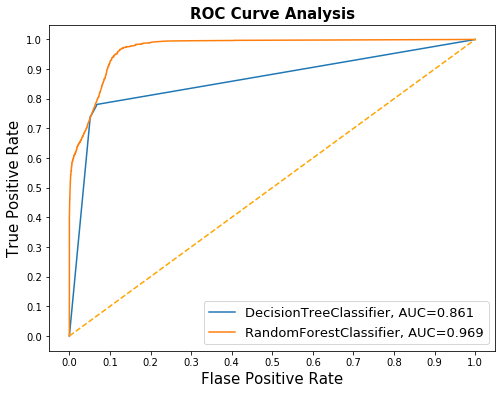

In [425]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [426]:
threshold = 0.4

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = metrics.accuracy_score(y_test, predicted)

In [427]:
print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted Observation     0     1
Actual Observation               
0                      7580   617
1                       342  1728
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8197
           1       0.76      0.79      0.78      2070

    accuracy                           0.91     10267
   macro avg       0.85      0.86      0.86     10267
weighted avg       0.91      0.91      0.91     10267


Accuracy: 0.9081523327164702


In [428]:
threshold = 0.3

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = metrics.accuracy_score(y_test, predicted)


In [429]:
print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted Observation     0     1
Actual Observation               
0                      7477   720
1                       262  1808
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8197
           1       0.76      0.79      0.78      2070

    accuracy                           0.91     10267
   macro avg       0.85      0.86      0.86     10267
weighted avg       0.91      0.91      0.91     10267


Accuracy: 0.9081523327164702


In [219]:
#SVM

In [220]:
import sys
!{sys.executable} -m pip install cvxopt

In [221]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

/Users/arvindpawar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [222]:
# #Creating the dependent variable class
# factor = pd.factorize(tpHighDf['classification'])
# tpHighDf.classification = factor[0]
# definitions = factor[1]
# print(tpHighDf.classification.head())
# print(definitions)

# X = tpHighDf.iloc[:, np.r_[2:80]].values
# Y = tpHighDf.iloc[:,1].values

In [223]:
#Creating the dependent variable class
factor = pd.factorize(tpHighNewDf['classification'])
tpHighNewDf.classification = factor[0]
definitions = factor[1]
print(tpHighNewDf.classification.head())
print(definitions)

X = tpHighNewDf.iloc[:, np.r_[2:80]].values
Y = tpHighNewDf.iloc[:,1].values

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=21)

In [225]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [226]:
svc = LinearSVC()


In [ ]:
# print("Performance measures of SVM for Notable Risk", sep=('\n'))
# print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))
# print("")
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# accuracy = metrics.accuracy_score(y_test, predicted)
# accuracy

In [144]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
newdataframe=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]].copy()

In [147]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=newdataframe.columns).sort_values(ascending=False)
feature_imp

score                                        1.552357e-01
risk_factor                                  1.408603e-01
owner_name_Senior_Analyst_1                  1.045323e-01
owner_name_Senior_Analyst_2                  8.075336e-02
tenure                                       7.814932e-02
                                                 ...     
indicators_App_9_Heat_RDP_IND                3.226162e-07
indicators_App_3_Heat_Email_HRO              2.519562e-07
job_function_JOB_FUNCTION_2                  1.629955e-07
indicators_App_1_Heat_CD_Burn_PRE_2016_Q3    9.182314e-08
job_function_JOB_FUNCTION_4                  7.327550e-08
Length: 142, dtype: float64

In [148]:
feature_imp=feature_imp.nlargest(20)

No handles with labels found to put in legend.


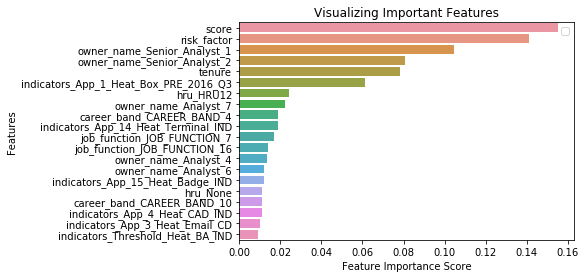

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [453]:
#Gradient Boosting

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [454]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8,career_band_CAREER_BAND_9
0,1344,19616361638,5.868996,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1392,19616361638,6.078603,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1377,19616361638,5.884615,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1383,19616361638,5.668033,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1380,19616361638,5.587045,0,22.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [455]:
tpHighNewDf['classification'].value_counts()

0    27503
1     6720
Name: classification, dtype: int64

In [456]:
#Creating the dependent variable class
factor = pd.factorize(tpHighDf['classification'])
tpHighDf.classification = factor[0]
definitions = factor[1]
print(tpHighDf.classification.head())
print(definitions)

X=tpHighDf.iloc[:, np.r_[0, 2, 4:147]]
Y=tpHighDf.iloc[:, 3]

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [457]:
# #Creating the dependent variable class
# factor = pd.factorize(tpHighNewDf['classification'])
# tpHighNewDf.classification = factor[0]
# definitions = factor[1]
# print(tpHighNewDf.classification.head())
# print(definitions)

# X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:147]]
# Y=tpHighNewDf.iloc[:, 3]


In [458]:
print(X.shape)

print(Y.shape)

(34223, 145)
(34223,)


In [459]:
import sys
!{sys.executable} -m pip install imblearn

In [460]:
from imblearn.over_sampling import (RandomOverSampler)

In [461]:
import scipy

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [463]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [464]:
model=GradientBoostingClassifier()

In [465]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
11679    0
11679    0
11679    0
11680    0
11680    0
Name: classification, Length: 34223, dtype: int64

In [466]:
model.fit(X_rs, y_rs)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [467]:
y_pred=model.predict(X_test)

In [468]:
print(confusion_matrix(y_test, y_pred))

[[8007 1197]
 [ 238  825]]


In [469]:
print("Gradient Boosting for High Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], 
                  colnames=['Predicted Observation']))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Gradient Boosting for High Risk
Predicted Observation     0     1
Actual Observation               
0                      8007  1197
1                       238   825
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      9204
           1       0.41      0.78      0.53      1063

    accuracy                           0.86     10267
   macro avg       0.69      0.82      0.73     10267
weighted avg       0.91      0.86      0.88     10267


Accuracy: 0.8602318106554983


In [447]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8264566202906124

In [448]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8512710626278368


In [449]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      8223
           1       0.60      0.79      0.68      2044

    accuracy                           0.85     10267
   macro avg       0.77      0.83      0.79     10267
weighted avg       0.87      0.85      0.86     10267



In [450]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              GradientBoostingClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_rs, y_rs)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

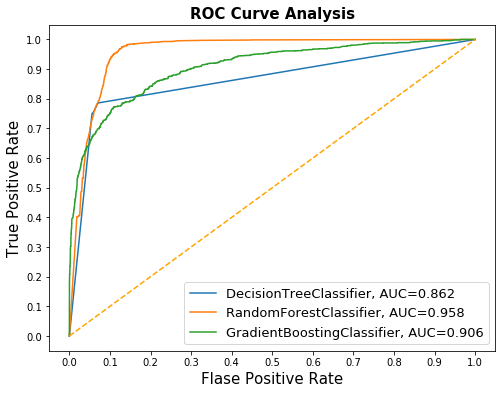

In [451]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

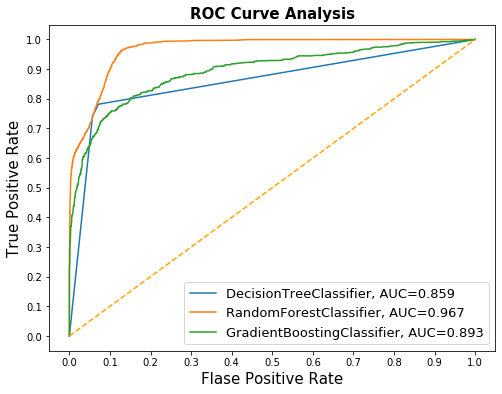

In [452]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              GradientBoostingClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

